# Joe Stanley
#### ECE 525 - Midterm Exam (EX 1)

In [8]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import eepower as eep
from eepower import u,m,k,M

# Define Maximum Torque Angle Formula
def torqueangle(Vbc,Ia,k=1,beta=None):
    """
    torqueangle Function
    
    Calculates the torque angle from the
    respective voltage and current.
    
    Parameters
    ----------
    Vbc:        complex
                The voltage between phases B and C, may
                be a float (not complex) if beta is specified
                as value other than None.
    Ia:         complex
                The current in phase A, may be a float (not
                complex) if beta is specified as value other
                than None.
    k:          float, optional
                The specified design constant.
    beta:       float, optional
                The angle difference between Vbc and Ia. Must
                be specified if Vbc and/or Ia are specified as
                floats. default=None
    
    Returns
    -------
    TA:         float
                Calculated Maximum Torque Angle.
    """
    # Test if beta must be calculated
    if beta==None:
        # Calculate beta from angles
        beta = np.angle(Vbc) - np.angle(Ia)
    else:
        # Convert beta to radians
        beta = np.radians(beta)
    # Evaluate MTA
    TA = k*abs(Vbc)*abs(Ia)*np.cos(beta-np.radians(90))
    return(MTA)

## Problem 1:
a) **How does one determine the coordinating time between a protective device and a
downstream device? Explain how this is implemented in a protection scheme if inverse
time overcurrent elements are used? How might you implement it if you are only using
instantaneous overcurrent elements?**

- Coordination between protective devices (upstream and downstream) relies primarily on a time delay commonly referred to as a time-dial. The term "Time-Dial" reffers to the mechanical setting that must be applied in electro-mechanical relays. However, the setting still applies in modern microprocessor based relays. When using inverse-time-over-current elements, this can be applied based on a formula that takes into account the pickup settings for both upstream/downstream devices and the coordinating time interval to evaluate a constant time-dial setting based on the TOC curve of choice (ie U1, U2, C1, etc.). When applying solely instantaneous OC elements instead of the more adaptive inverse TOC elements, a constant pickup delay may be applied in conjunction with the OC element, thus the OC must be sustained for a certain delay period (regardless of current amplitude) before the element asserts. With multiple OC elements, this can be applied in a step fashion, creating a trip characteristic that begins to better resemble a TOC element.

b) **Why would an inverse time overcurrent be combined with instantaneous overcurrent
element? Sketch a combined characteristic for such an implementation and describe how it
works. Describe an application where this would be used.**

- Such combinations might be used to act on high-current, close-in faults, thus reducing the time required before tripping. The figure below (taken from Homework 4) illustrates how the combination might appear in terms of tripping characteristics. Notice that the green and dashed orange lines both cary the same curve characteristic, but because of the combined instantaneous element, the green line drops to (essentially) zero when the current level surpasses the pickup threshold.
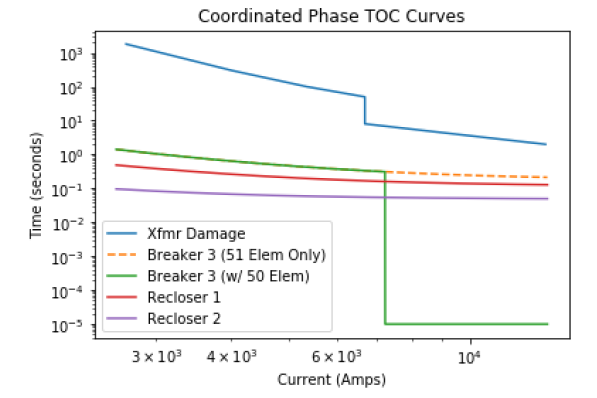

c) **How could symmetrical component based overcurrent elements improve the performance of
overcurrent elements? What are the advantages? Is any special equipment needed to
implement zero sequence or negative sequence based elements?**

- Symmetrical components can aid protection in their effective pickup of smaller faults; faults that may not surpass the threshold for standard over-current elements, but surpass the characteristics set for imbalance tripping. Additionally, seq-comp based protection can help determine the direction of the fault. Typically, "special" equipment is not required to use seq-comp protection, but microprocessor-based relays typically are required as they can perform the calculations internally to determine tripping characteristics.

d) **As you begin setting inverse time overcurrent relays for a radial distribution system, the short
circuit MVA looking into the transmission system is given as a range from 66 MVA to 90 MVA.
Which value do you when determining minimum pick up levels for the relays and reclosers in the
circuit? Which do you use for determining time dial settings?**

- Determining minimum pickup levels for relays and reclosers would require the minimum fault current, thus the minimum short-circuit-MVA (66-MVA). Determining the time-dial settings requires the maximum fault current, thus the maximum SCMVA (90-MVA).

e) **Due to power quality problems arising from voltage sags, an inductive reactance is added in the
neutral to ground path of a transformer supplying several distribution feeders. Assuming the
overcurrent protection uses phase elements and ground elements, will any settings need to be
changed as a result? If so, which ones and how are they changed?**

- Yes, some settings will likely require alteration. The settings that should be altered should be the ground-element settings, they should be changed to account for the additional reactance.

## Problem 2:

a) **Describe what causes a CT to saturate. Comment on how this differs if the current is only at
fundamental frequency versus a combination of fundamental frequency and a decaying dc
offset.**

- CTs can saturate for a variety of reasons, however, the largest reasons are because of being over-burdened or because of having too much current travel through their primary. CTs, like all transformers, carry a B-H curve characteristic. The characteristic is largely non-linear, but we use the linear portions of the CT's characteristic to evaluate the current levels. If the current is too great, or the burden is too high, the CT will leave the linear portion, falling into what we call saturation.
- Adding a decaying DC offset to a standard fundamental frequency further complicates the CT B-H relationship. The offset will further press the operation out of a linear region, making the CT's characteristics increasingly complex.

b) **How would CT saturation impact the performance of a overcurrent relay? If this causes a
misoperation, in what way will it misoperate? Will it eventually give a correct output?
Support your answer for each.**

- CT saturation often causes a relay to underpercieve the current on a line, thust they will often misoperate by missing characteristics which require tripping. The CT's saturation often is a passing characteristic, thus it will often correct itself shortly after it causes problems, so the relay will eventually operate correctly (given enough time).

c) **Do CT's work better with a small burden impedance or a large burden impedance? Explain**

- CTs work better with smaller burden impedances (just as the word burden so implies). The larger the burden impedance, the further the CT strays from its linear region (and thus closer to saturation).

d) **Explain why it is a bad idea for an unused CT to be open circuited? Does an open circuited
CT impact the primary side power system? What should you do with a CT when the output
is not needed (possibly temporarily)?**

- CTs are treated as if they are current sources, and an open circuit can be represented by a resistor with an infinite (or nearly infinite) resistance. From the perspective of burden impedance, an infinite resistance is very bad, and will cause saturation issues; worse yet, from the perspective of the CT acting as a current source, with an infinite resistance, a current source must generate an equally infinite voltage to overcome the resistance. Such performance will enable arcing and thus can be dangerous and damaging.
- When removing equipment from service and pulling it from connected CTs, the CTs should be shorted. In fact, in most cases, CT connections are made with a CT shorting bar or shorting switch that make this process quite easy.
- CT open-circuits will inevitably impact the primary power system, although they may or may not have significant impact based on the system parameters.

e) **Is it sufficient to delay the onset of saturation or must it be avoided altogether? If so, how do
you decide how much delay is acceptable? Explain**

- Undoubtedly, it is far better to avoid CT saturation altogether, but in certain situations, delaying such performance may be accepted. The acceptable delay is determined by identifying how much time is required between fault inception, and fault detection. In other words, the delay is based on how long it takes for the relay to identify the characteristics that justify tripping.

## Problem 3:

a) **Would you be concerned about using a wound VT to measure voltage harmonics or other high
frequency disturbances? How about if you only want to detect a transient event has occurs
rather than accurate magnitude and angle? Explain your answer.**

- Traditional (wound) VTs (or, equally, PTs) are able to measure harmonics quite well as they do not inherently apply any frequency filtering due to capacitive reactance, since they are simply wound transformers, they transfer harmonic content quite well.
- Traditional VTs would not be my primary choice for detecting transient events (regardless of mag/ang) because they would be subject to saturation and likely not provide useful data.

b) **Repeat part A for a CVT. Explain your answer.**

- CVTs are not able to accurately measure harmonic content since they apply inherent filtering due to their capacitive nature. As such, the data would be filtered and provide inacurate harmonic levels.
- CVTs would be a primary choice for identifying transient information since their response would be (largely) unimpeded by saturation characteristics due to their capacitive construction. As suggested, their magnitudes and angles may be largely incorrect, but they would likely provide enough useful information to correctly identify transients.

c) **What options can be chosen to improve CVT performance when choosing a CVT? What are
the trade-offs with these options?**

- Chosing an active or passive CVT and the C-rating of the CVT are both considerations for chosing a CVT. Changing the C-rating will affect the sensitivity, and the range of the CVT. Chosing active/passive will affect the frequency response of the CVT.

d) **Is saturation normally a concern for VTs or CVTs? Are there circumstances where it could arise?
Explain your answer and describe any circumstances.**

- Saturation is primarily a concern for VTs, but it can also affect CVTs. Over-burdening the VTs can cause saturation, as well as certain transient characteristics.

e) **How might a CVT transient impact the performance of a protective relay response? Out of the
types of elements discussed so far, which are more likely to be effected?**

- CVT transients impact the performance of protective relays by increasing the time to accurately evaluate fault characteristics. These transients increase the number of time-steps it takes to evaluate the fault impedance. In many situations, this delay causes inacurate fault impedance encroachment curves. These curves may fall into the operate zone of a relay element (typically instantaneous -50- elements).

## Problem 4:

a) **Determine the value for the maximum torque angle (explain your reasoning behind this
selection). Also explain why you need a maximum torque angle.**

- According to the formula: $MTA=k*|V_{BC}|*|I_A|*cos(\beta-90°)$ and the circuit parameters (which dictate zero power flow) the maximum torque angle is zero; this is because the phase-A current ($I_A$) is zero. The maximum torque angle was a term coined for use in electro-mechanical relays, but it is still used frquently with modern microprocessor relays. It is used to determine the direction of the fault.

b) **Determine the direction to fault relative to the relay location using at least two significantly
different methods for each fault and also try to identify the fault type. Explain how you made this
determination and why you selected the methods you used (this reasoning may differ by case)**

In [30]:
# Define Case Components
# CASE A:
IabcFA = [eep.phasor(5.2658,-85.7889),
          eep.phasor(5.2658,-205.7889),
          eep.phasor(5.2658,34.2111)]
VabcFA = [eep.phasor(0.3159,-0.7889),
          eep.phasor(0.3159,-120.7889),
          eep.phasor(0.3159,119.2111)]
# CASE B:
IabcFB = [eep.phasor(0,0),
          eep.phasor(4.3201,-10.3489),
          eep.phasor(4.3201,-162.5532)]
VabcFB = [eep.phasor(1.1935,0.1121),
          eep.phasor(0.3228,-121.451),
          eep.phasor(0.3228,118.549)]
# CASE C:
IabcFC = [eep.phasor(3.2957,-76.9625),
          eep.phasor(1.2874,-126.6662),
          eep.phasor(1.2874,113.3338)]
VabcFC = [eep.phasor(0.3159,-0.7889),
          eep.phasor(1.1271,-142.0355),
          eep.phasor(1.156,121.4844)]
# CASE D:
IabcFD = [eep.phasor(1.2874,-6.6662),
          eep.phasor(1.2452,50.4357),
          eep.phasor(2.2247,-158.6344)]
VabcFD = [eep.phasor(0.9833,-9.6265),
          eep.phasor(1.0374,-149.5794),
          eep.phasor(0.6938,96.1953)]

# Determine Fault Location
def faultloc(V,I):
    print("Sequence Component Analysis")
    V012 = eep.Aabc.dot(V)
    I012 = eep.Aabc.dot(I)
    Z012 = V012/I012
    Z1 = Z012[1]
    if(abs(np.degrees(np.angle(Z1))) < 90):
        print("Fault Occurred Downstream (between Bus-1 and Bus-R)")
    else:
        print("Fault Occurred Upstream (between Bus-1 and Bus-S)")
    eep.cprint(Z1,label="Pos-Seq-Z")
def loadflow(V):
    print("Load Flow Analysis")
    P = 0
    for i in range(3):
        Vs = eep.phasor(1,0)
        Zx = eep.phasor(0.1,85)+0.03j
        P += eep.powerflow(Vs,V[i],Zx)
    if(abs(np.degrees(np.angle(P))) < 90):
        print("Fault Occurred Downstream (between Bus-1 and Bus-R)")
    else:
        print("Fault Occurred Upstream (between Bus-1 and Bus-S)")
    eep.cprint(P,label="Total Power Flow")


# CASE A:
faultloc(VabcFA,IabcFA)
loadflow(VabcFA)
print()
# CASE B:
faultloc(VabcFB,IabcFB)
eep.cprint(eep.Aabc.dot(VabcFB),"V")
eep.cprint(eep.Aabc.dot(IabcFB),"I")
print()
# CASE C:
faultloc(VabcFC,IabcFC)
eep.cprint(eep.Aabc.dot(VabcFC),"V")
eep.cprint(eep.Aabc.dot(IabcFC),"I")
print()
# CASE D:
faultloc(VabcFD,IabcFD)
loadflow(VabcFD)
eep.cprint(eep.Aabc.dot(IabcFD),"I")

Sequence Component Analysis
Fault Occurred Downstream (between Bus-1 and Bus-R)
Pos-Seq-Z 0.06 ∠ 85.0° 
Load Flow Analysis
Fault Occurred Downstream (between Bus-1 and Bus-R)
Total Power Flow 0.0 ∠ -82.875° 

Sequence Component Analysis
Fault Occurred Upstream (between Bus-1 and Bus-S)
Pos-Seq-Z 0.222 ∠ -93.986° 
[[' 0.29 ∠ 0.691° V']
 [' 0.613 ∠ -0.437° V']
 [' 0.29 ∠ 0.691° V']]
[[' 0.692 ∠ -86.451° I']
 [' 2.767 ∠ 93.549° I']
 [' 2.075 ∠ -86.451° I']]

Sequence Component Analysis
Fault Occurred Downstream (between Bus-1 and Bus-R)
Pos-Seq-Z 0.529 ∠ 37.784° 
[[' 0.404 ∠ 166.24° V']
 [' 0.849 ∠ -8.972° V']
 [' 0.135 ∠ 166.229° V']]
[[' 1.036 ∠ -99.917° I']
 [' 1.606 ∠ -46.756° I']
 [' 1.036 ∠ -99.917° I']]

Sequence Component Analysis
Fault Occurred Upstream (between Bus-1 and Bus-S)
Pos-Seq-Z 1.172 ∠ -101.213° 
Load Flow Analysis
Fault Occurred Upstream (between Bus-1 and Bus-S)
Total Power Flow 0.0 ∠ 93.847° 
[[' 0.0 ∠ -33.381° I']
 [' 0.763 ∠ 80.324° I']
 [' 1.462 ∠ -38.091° I']]


*From analysis of the faults characterized above, the following can be found:*

#### Case A:
- Downstream, 3-Phase Fault
- Direction Determined by Sequence Impedance
- Fault type characterized by equal voltage/current magnitudes

#### Case B:
- Upstream, line-to-line-to-ground
- Direction Determined by Sequence Impedance
- Fault type characterized by Sequence Components

#### Case C:
- Downstream, single-line-to-ground
- Direction Determined by Sequence Impedance
- Fault type characterized by Sequence Currents

#### Case D:
- Upstream fault (Unidentified)
- Direction Determined by Sequence Impedance